In [69]:
import numpy as  np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [70]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std = 0.4)

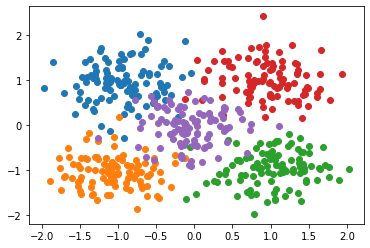

In [71]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

In [72]:
y_cat = to_categorical(y, 5) # 현재 y는 0,1,2 로 데이터셋이 나뉘어 있는 상태. 하지만 0, 1, 2는 대소관계가 있으므로 neural model이 서로 관계가 있다고 봄. 따라서 원하지 않는 결과가 나온다. 3개의 데이터셋이 별개라는 것을
# 알려주기 위해 one hot encoding, 즉 001, 010, 100 형태로 바꾼다.

In [73]:
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax')) # sigmoid fucntion cannot classify multiclass datasets. Therefore, we use softmax function which can be written as e^i / e^0 + e^1 + ... + e^n
model.compile(Adam(0.1), loss = 'categorical_crossentropy', metrics=['accuracy']) # - sigma sigma y ln(p) 로 에러를 구한다. 우리가 알고있는 카테고리 y 와 자연로그를 취한 값을 곱함. 마지막에는 마이너스 해줌으로서 양수로 변환

In [74]:
model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 1.0350 - accuracy: 0.6400
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5468 - accuracy: 0.8420
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3777 - accuracy: 0.9300
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.9480
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2701 - accuracy: 0.9420
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.9460
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2330 - accuracy: 0.9460
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2199 - accuracy: 0.9440
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2120 - accuracy: 0.9520
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9500
Epoch 11/

In [75]:
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25) #  grid making.
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span) # xx 는 (1, 50) 인 x를 (50, 50) 행렬로 만듬. yy도 똑같음
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_] # xx와 yy를 열로 바꾼 후 concatenate하는 함수.
    pred_func = np.argmax(model.predict(grid), axis=-1) # grid에 있는 모든 점들에 대한 prediction 실행. axis = -1 = 1 에서 최댓값을 가지는 index(i.e. 카테고리)를 돌려줌
    z = pred_func.reshape(xx.shape) # 결과의 모양을 바꿔줌줌
    plt.contourf(xx, yy, z) # 그림으로 나타냄

79/79 [==============================] - 0s 1ms/step


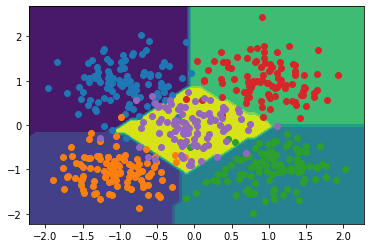

In [76]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])

1/1 [==============================] - 0s 41ms/step
Prediction is [3]


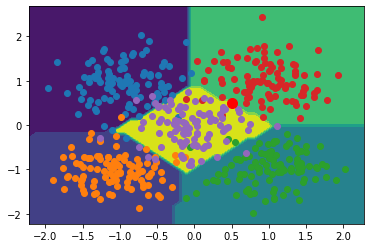

In [77]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.scatter(X[y==3, 0], X[y==3, 1])
plt.scatter(X[y==4, 0], X[y==4, 1])
x = 0.5
y = 0.5
point = np.array([[x, y]])
prediction=np.argmax(model.predict(point), axis=-1)
plt.plot([x], [y], marker='o', markersize=10, color="r")
print("Prediction is", prediction)